In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
groceries =pd.read_csv('groceries.csv', sep=";",header=None)
# Visualizamos los datos 
print(groceries.head())

                                                   0
0  citrus fruit,semi-finished bread,margarine,rea...
1                       tropical fruit,yogurt,coffee
2                                         whole milk
3        pip fruit,yogurt,cream cheese ,meat spreads
4  other vegetables,whole milk,condensed milk,lon...


In [23]:
unique_items_list = []

# for each index it will iter row by row
for index, row in groceries.iterrows():  
    
    # splitting items with , and creating a new list for row & it will going add it agian 
    # ...item_series list for each iteration..so item_series will be list of lists..
    items_series = list(row.str.split(','))
    
    
    # agian reading each list elements from item_Series which is big list as mentioned above code
    for each_row_list in items_series:
        
        # iterating each item from each_row_lists
        for item in each_row_list:
            
            # for first iteration..unique_items_list is empty so first item directly append to it.
            #...from next onwards..it will start to check condition 'not in'
            #....& if item not found in unique_items_list list then it will append to it.
            #......finally we will get one unique item list..
            if item not in unique_items_list:
                unique_items_list.append(item)


In [24]:
df_apriori = pd.DataFrame(columns=unique_items_list)


In [25]:
df_apriori

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products


In [26]:
dataset1 =df_apriori.copy()


In [31]:
for index, row in groceries.iterrows():
    items = str(row[0]).split(',')
    one_hot_encoding = np.zeros(len(unique_items_list),dtype=int)
    for item_name in items:
        for i,column in enumerate(dataset1.columns):
            if item_name == column:
                one_hot_encoding[i] = 1
    dataset1.loc[len(dataset1)] = one_hot_encoding



In [32]:
# Transction encoder is fastest method to do all this.
dataset1.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dataset1.shape


(9835, 169)

In [34]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9835 entries, 0 to 9834
Columns: 169 entries, citrus fruit to preservation products
dtypes: int32(169)
memory usage: 6.4 MB


In [35]:
# Sinced efault datatype saved as 'object'. Converting in 'integer' datatype

dataset1 = dataset1.astype('uint8')
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9835 entries, 0 to 9834
Columns: 169 entries, citrus fruit to preservation products
dtypes: uint8(169)
memory usage: 1.7 MB


In [36]:
dataset1.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
zero =[]
one = []
for i in df_apriori.columns:
    zero.append(list(dataset1[i].value_counts())[0])
    one.append(list(dataset1[i].value_counts())[1])

In [38]:
count_df = pd.DataFrame([zero,one], columns=df_apriori.copy().columns)

In [39]:
count_df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,9021,9661,9259,9817,8803,8463,9264,7322,9091,9445,...,9834,9812,9812,9827,9823,9831,9810,9834,9831,9833
1,814,174,576,18,1032,1372,571,2513,744,390,...,1,23,23,8,12,4,25,1,4,2


In [40]:
count_df.index = ['Not_Purchased', 'Purchased']
count_df

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
Not_Purchased,9021,9661,9259,9817,8803,8463,9264,7322,9091,9445,...,9834,9812,9812,9827,9823,9831,9810,9834,9831,9833
Purchased,814,174,576,18,1032,1372,571,2513,744,390,...,1,23,23,8,12,4,25,1,4,2


In [41]:
print('maximum purchased item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('minimum purchased item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())

maximum purchased item: whole milk : 2513
minimum purchased item: baby food : 9834


In [42]:
# Simplest way to sort elements..

sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df.head(20)

,Not_Purchased,Purchased
whole milk,7322,2513
other vegetables,7932,1903
rolls/buns,8026,1809
soda,8120,1715
yogurt,8463,1372
bottled water,8748,1087
root vegetables,8763,1072
tropical fruit,8803,1032
shopping bags,8866,969
sausage,8911,924


In [43]:
sorted_df['Purchased%']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df.head()

,Not_Purchased,Purchased,Purchased%
whole milk,7322,2513,0.057947
other vegetables,7932,1903,0.043881
rolls/buns,8026,1809,0.041714
soda,8120,1715,0.039546
yogurt,8463,1372,0.031637


In [44]:
# Finding out avergae of the total purchased% so that we get idea about min_support value setting.

np.mean(sorted_df['Purchased%'])

0.005917159763313609

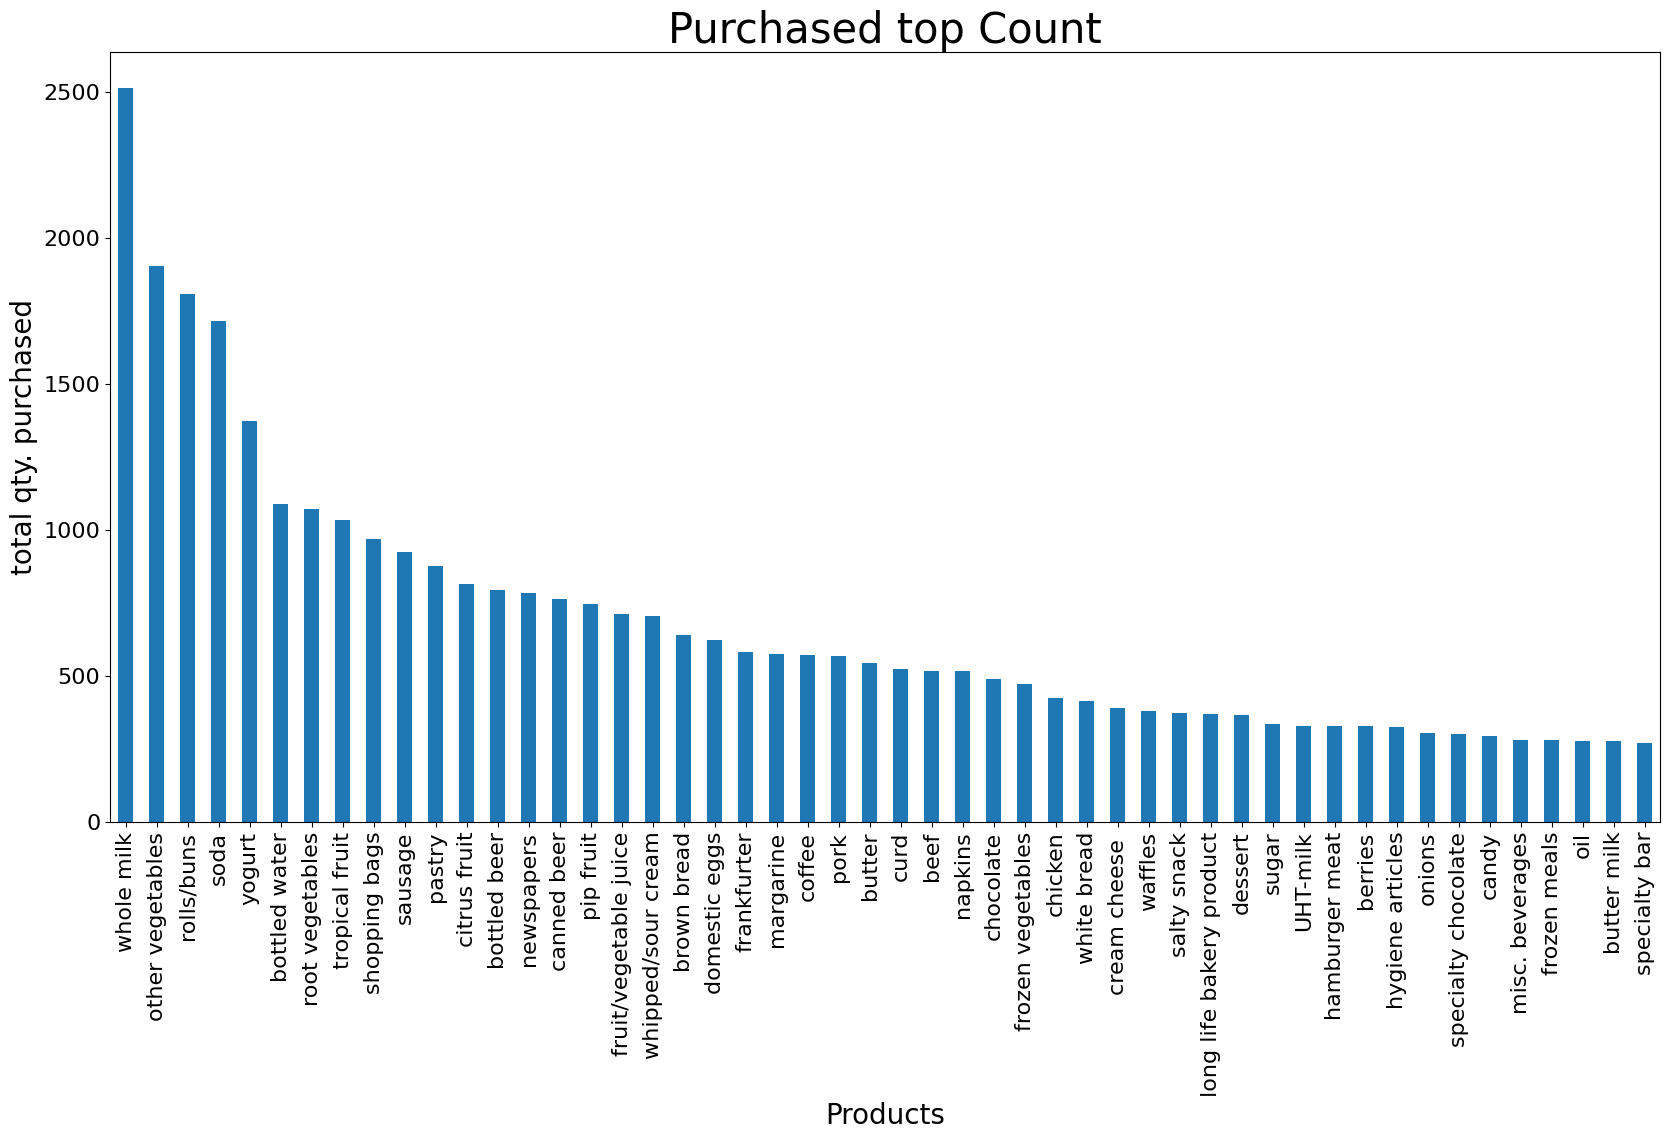

In [45]:
fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('total qty. purchased', fontsize=20)
plt.show()

In [46]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(dataset1, min_support=0.02, use_colnames=True, max_len=5)

# min_support value can be choose by the user/business need
# max_len is item combinations..here i have taken as 5. total items in combination formed should not be more than 5
freq_items.shape


C:\Users\serra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(122, 2)

In [47]:
freq_items.head(10)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.104931,(tropical fruit)
3,0.139502,(yogurt)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.039654,(cream cheese )
8,0.193493,(other vegetables)
9,0.037417,(long life bakery product)


In [48]:
freq_items.tail(10)

,support,itemsets
112,0.038332,"(rolls/buns, soda)"
113,0.020946,"(rolls/buns, pastry)"
114,0.024301,"(rolls/buns, root vegetables)"
115,0.030605,"(rolls/buns, sausage)"
116,0.028978,"(bottled water, soda)"
117,0.021047,"(soda, pastry)"
118,0.024301,"(sausage, soda)"
119,0.024606,"(shopping bags, soda)"
120,0.022267,"(other vegetables, whole milk, yogurt)"
121,0.023183,"(root vegetables, other vegetables, whole milk)"


In [49]:
# for this we need support value dataframe..that is fre_items from measure1.

confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

# min_threshold is nothing but setting min % crieteria. In this case i have choosen 20% 
#...confidence should be minimum 20%.
# checking combination in first 10 rows from dataset

confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467,0.509009
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,0.334375
2,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674,0.485603
3,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706,0.405348
4,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594,0.558749
5,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873,0.581197
6,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
7,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392,0.661650
8,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796,0.485239
9,(tropical fruit),(rolls/buns),0.104931,0.183935,0.024606,0.234496,1.274886,0.005305,1.066050,0.240894


In [50]:
# checking combination in last 10 rows from dataset

confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,(pastry),(soda),0.088968,0.174377,0.021047,0.236571,1.356665,0.005533,1.081467,0.288572
64,(sausage),(soda),0.093950,0.174377,0.024301,0.258658,1.483324,0.007918,1.113687,0.359626
65,(shopping bags),(soda),0.098526,0.174377,0.024606,0.249742,1.432194,0.007425,1.100452,0.334752
66,"(other vegetables, whole milk)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003,0.574138
67,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
68,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511,0.543633
69,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687,0.501524
70,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
71,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
72,(root vegetables),"(other vegetables, whole milk)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091,0.727435


In [51]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)
lift_association.shape
(126, 9)
lift_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467,0.509009
1,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803,0.542570
2,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,0.334375
3,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577,0.411963
4,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674,0.485603
5,(other vegetables),(citrus fruit),0.193493,0.082766,0.028876,0.149238,1.803140,0.012862,1.078133,0.552273
6,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706,0.405348
7,(whole milk),(margarine),0.255516,0.058566,0.024199,0.094708,1.617098,0.009235,1.039922,0.512581
8,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594,0.558749
9,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873,0.581197


In [52]:
lift_association.tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
121,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
122,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
123,(root vegetables),"(other vegetables, whole milk)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091,0.727435
124,(other vegetables),"(root vegetables, whole milk)",0.193493,0.048907,0.023183,0.119811,2.449770,0.013719,1.080555,0.733779
125,(whole milk),"(root vegetables, other vegetables)",0.255516,0.047382,0.023183,0.090728,1.914833,0.011076,1.047672,0.641735


In [53]:
redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
1,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
3,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
4,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202


In [54]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
121,(other vegetables),(bottled water),0.193493,0.110524,0.024809,0.128219,1.160101,0.003424,1.020297,0.171116
122,(yogurt),(soda),0.139502,0.174377,0.027351,0.196064,1.124368,0.003025,1.026976,0.128543
123,(soda),(yogurt),0.174377,0.139502,0.027351,0.156851,1.124368,0.003025,1.020577,0.133973
124,(tropical fruit),(soda),0.104931,0.174377,0.020844,0.198643,1.139159,0.002546,1.030281,0.136481
125,(soda),(tropical fruit),0.174377,0.104931,0.020844,0.119534,1.139159,0.002546,1.016585,0.147960


In [55]:
unique_rules = redundancy.iloc[::2]
unique_rules.shape
(63, 9)
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
4,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
6,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
8,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
10,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796,0.485239
12,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
14,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
16,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
18,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594,0.558749


In [56]:
unique_rules = redundancy.iloc[::2]
unique_rules.shape
(63, 9)
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
4,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
6,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
8,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
10,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796,0.485239
12,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
14,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
16,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
18,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594,0.558749


In [59]:
top_20 = unique_rules[unique_rules['lift']>1.5]
top_20_sort = top_20.sort_values(by='lift', ascending=False)
top_20_sort.reset_index(inplace=True)
top_20_sort = top_20_sort.drop(['index'],axis=1)
top_20_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
1,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392,0.661650
2,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
3,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
4,"(other vegetables, whole milk)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003,0.574138


In [60]:
x = top_20_sort[['antecedents','consequents']]
item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list .append(j)
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    top_items =[]
    for m in unique_list:
        top_items.append(m)
    print(top_items)

In [61]:
unique(item_list)

['fruit/vegetable juice', 'other vegetables', 'margarine', 'bottled water', 'yogurt', 'sausage', 'frozen vegetables', 'tropical fruit', 'whole milk', 'curd', 'domestic eggs', 'butter', 'beef', 'pork', 'citrus fruit', 'pip fruit', 'soda', 'rolls/buns', 'brown bread', 'whipped/sour cream', 'root vegetables']
